<a href="https://colab.research.google.com/github/opinner/Pinner_et_al_2024/blob/thesis/docs/Seasonal_distribution_of_CTD_profiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_Joinville_transect_CTDs(path):

    CTDs = pd.read_csv(path)

    print(f"loading of {path} was successful")
    print("renaming of matlab style columns:")
    new_columns = ['index', 'Event', 'Latitude', 'Longitude', 'Press [dbar]', 'Sal', 'Temp [°C]', 'Absolute Salinity', 'Conservative Temperature', 'Date/Time',
        'Depth water [m]',   'Expedition', "Neutral density [kg m^-3]"]
    for i,j in zip(CTDs.columns, new_columns):
        print("\t",i,"\t",j)
    CTDs.columns = new_columns
    CTDs.set_index("index", inplace=True)
    CTDs["Date/Time"] = pd.to_datetime(CTDs["Date/Time"])
    return CTDs

***Download data set manually from https://nextcloud.awi.de/s/ad9W5p7EnH8XAAX ***

Cancel the parsing of the data in nextcloud by clicking the **X** and there will be a download button

In [4]:
! wget https://nextcloud.awi.de/s/ad9W5p7EnH8XAAX/download/joinville_transect_ctds_incl_neutral_density.csv

--2024-10-16 21:25:14--  https://nextcloud.awi.de/s/ad9W5p7EnH8XAAX/download/joinville_transect_ctds_incl_neutral_density.csv
Resolving nextcloud.awi.de (nextcloud.awi.de)... 134.1.2.153
Connecting to nextcloud.awi.de (nextcloud.awi.de)|134.1.2.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34300711 (33M) [text/csv]
Saving to: ‘joinville_transect_ctds_incl_neutral_density.csv’

joinville_transect_ 100%[===================>]  32.71M  10.5MB/s    in 3.7s    

2024-10-16 21:25:19 (8.80 MB/s) - ‘joinville_transect_ctds_incl_neutral_density.csv’ saved [34300711/34300711]



In [5]:
CTDs = load_Joinville_transect_CTDs("./joinville_transect_ctds_incl_neutral_density.csv")

loading of ./joinville_transect_ctds_incl_neutral_density.csv was successful
renaming of matlab style columns:
	 Var1 	 index
	 Event 	 Event
	 Latitude 	 Latitude
	 Longitude 	 Longitude
	 Press_dbar_ 	 Press [dbar]
	 Sal 	 Sal
	 Temp__C_ 	 Temp [°C]
	 AbsoluteSalinity 	 Absolute Salinity
	 ConservativeTemperature 	 Conservative Temperature
	 Date_Time 	 Date/Time
	 DepthWater_m_ 	 Depth water [m]
	 Expedition 	 Expedition
	 neutral_density 	 Neutral density [kg m^-3]


In [6]:
CTDs

,Event,Latitude,Longitude,Press [dbar],Sal,Temp [°C],Absolute Salinity,Conservative Temperature,Date/Time,Depth water [m],Expedition,Neutral density [kg m^-3]
index,,,,,,,,,,,,
0,PS129_100_03,-64.2810,-47.4670,2,34.0119,-1.8516,34.178135,-1.847690,2022-04-19 22:48:30,1.980490,PS129,27.607695
1,PS129_100_03,-64.2810,-47.4670,3,34.0117,-1.8519,34.177921,-1.848007,2022-04-19 22:48:30,2.970727,PS129,27.607518
2,PS129_100_03,-64.2810,-47.4670,4,34.0122,-1.8555,34.178410,-1.851625,2022-04-19 22:48:30,3.960960,PS129,27.608094
3,PS129_100_03,-64.2810,-47.4670,5,34.0123,-1.8562,34.178497,-1.852341,2022-04-19 22:48:30,4.951188,PS129,27.608210
4,PS129_100_03,-64.2810,-47.4670,6,34.0125,-1.8567,34.178685,-1.852858,2022-04-19 22:48:30,5.941411,PS129,27.608414
...,...,...,...,...,...,...,...,...,...,...,...,...
291032,PS117_93-1,-63.2557,-53.4054,381,34.5890,-0.8440,NaN,NaN,2019-01-31 22:21:00,377.000000,PS117,28.228339
291033,PS117_93-1,-63.2557,-53.4054,382,34.5890,-0.8431,NaN,NaN,2019-01-31 22:21:00,378.000000,PS117,28.228201
291034,PS117_93-1,-63.2557,-53.4054,383,34.5891,-0.8413,NaN,NaN,2019-01-31 22:21:00,378.900000,PS117,28.228139


In [30]:
profiles_per_expedition = CTDs.groupby('Expedition')['Event'].nunique().reset_index()
profiles_per_expedition

,Expedition,Event
0,PS103,15
1,PS117,10
2,PS129,18
3,PS16,10
4,PS18,10
5,PS23,10
6,PS40,8
7,PS49,20
8,PS67,14
9,PS71,23


In [9]:
total_profile_count = CTDs['Event'].nunique()
print(f"The data set contains {total_profile_count} profiles in total")

The data set contains 168 profiles in total


(array([58.,  0., 37., 38.,  8.,  0.,  7.,  0., 10.,  0., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 11 artists>)

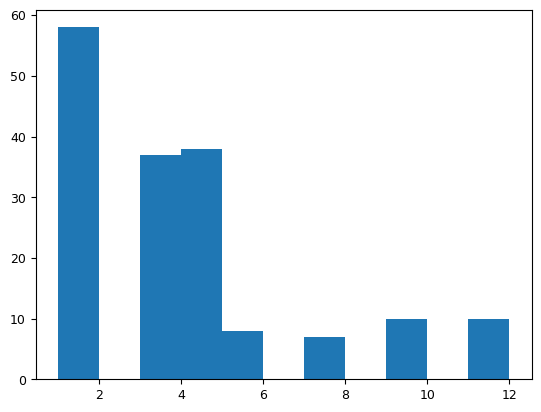

In [47]:
# df_unique = CTDs.drop_duplicates(subset=['Event'], keep='first')
# plt.hist(df_unique['Date/Time'].dt.month, bins = range(1,13), align = "mid")

In [54]:
# order_values = [1,11,12, 9, 8, 7, 6, 4, 5, 10, 3, 2]
# unique_expeditions = df_unique['Expedition'].unique()
# order_mapping = dict(zip(unique_expeditions, order_values, strict=True))
order_mapping = {'PS129': 1, 'PS117': 2, 'PS103': 3, 'PS81': 4, 'PS77': 5, 'PS71': 6, 'PS67': 7, 'PS49': 8, 'PS40': 9, 'PS23': 10, 'PS18': 11, 'PS16': 12}

In [55]:
# Keep only one row per profile
df_unique = CTDs.drop_duplicates(subset=['Event'], keep='first')

# Extract the month from the "Date/Time" column
df_unique['Month'] = df_unique['Date/Time'].dt.month

# sort the data frame after the chronological order of the expeditions
df_unique['order'] = df_unique['Expedition'].map(order_mapping)
df_unique = df_unique.sort_values(by="order", ascending = False)

# convert the data frame into a list of lists, with one list for each expedition
month_arrays = df_unique.groupby('Expedition', sort = False)['Month'].apply(lambda x: x.to_numpy()).tolist()
expedition_list = list(df_unique.groupby('Expedition', sort = False).groups.keys())

<ipython-input-55-8147f034d67e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Month'] = df_unique['Date/Time'].dt.month
<ipython-input-55-8147f034d67e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['order'] = df_unique['Expedition'].map(order_mapping)


In [57]:
ONE_COLUMN_WIDTH = 8.3
TWO_COLUMN_WIDTH = 12
GOLDEN_RATIO = 1.61
CM = 1/2.54  # centimeters in inches
plt.rcParams.update({
    "figure.facecolor": "white",
    "savefig.facecolor": "white",
    "font.size": 9
})

<ipython-input-66-11656dc79f6f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([months[(int(tick.get_text())-1)%12] for tick in xticks[:-1]])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

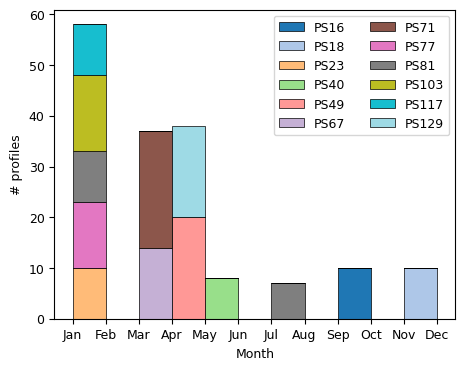

In [66]:
fig, ax = plt.subplots(1, figsize=(TWO_COLUMN_WIDTH*CM, 0.8*TWO_COLUMN_WIDTH*CM))

# Create a color map
colors = plt.cm.tab20(np.linspace(0, 1, len(expedition_list)))
bars = ax.hist(month_arrays, histtype = "barstacked", label=expedition_list, color = colors, bins = range(1,13), edgecolor = "k", lw = 0.5)

ax.set_xlabel('Month')
ax.set_ylabel('# profiles')
#ax.set_title('Stacked Bar Chart of Expeditions by Month')

# Replace the numeric ticks with month names
# Get the current x-tick labels
import matplotlib.ticker as mticker
ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
xticks = ax.get_xticklabels()
# Create a list of month names
months = pd.date_range('2024-01-01', periods=12, freq='ME').strftime('%b').tolist()

# Update the x-tick labels
# 1 must be subtracted to change from month indices, starting at 1, to list indices, starting from 0
ax.set_xticklabels([months[(int(tick.get_text())-1)%12] for tick in xticks[:-1]])

ax.legend(loc = "upper right", ncols = 2)
plt.tight_layout()
fig.savefig("CTD_seasonal_distribution.pdf")

#from google.colab import files
#files.download("CTD_seasonal_distribution.pdf")

In [67]:
austral_summer_half = [11,12,1,2,3,4]
summer_count = 0
winter_count = 0
for expedition_array in month_arrays:
  for value in expedition_array:
    assert value in range(1,13)
    if value in austral_summer_half:
      summer_count+=1
    else:
      winter_count+=1

print(f"{summer_count} of {summer_count + winter_count} profiles were measured in austral summer, which are {summer_count/(summer_count + winter_count):.1%}")

143 of 168 profiles were measured in austral summer, which are 85.1%
